In [2]:
# import autosklearn.regression
import sklearn.model_selection
import sklearn.metrics
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<h2>02 Data Collection</h2>

In [22]:
df = []
src = r"C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\train\train"
for file in os.listdir(src):
    df.append(pd.read_csv(os.path.join(src,file)))
for i in df:
    print(list(i))
df = pd.concat(df)
df = df.fillna(0)
df[-10:]

['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '29SoilTension', 'flow1', '26N', '26P', '26K']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
104,12_105,04:40:16.090733+00,44.1,31.2,0.0,47.64,0.0,0.0,0.5,3.0,38.8,22.8,0.11,5.0,21.0,95.0,87.0,105.0,0.0
105,12_106,04:42:16.132055+00,44.2,31.2,0.0,49.50,0.0,0.0,0.1,1.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,111.0,0.0
106,12_107,04:44:16.107327+00,45.2,30.8,0.0,50.03,0.0,0.0,1.2,7.0,37.4,22.8,0.11,5.0,21.0,95.0,87.0,113.0,0.0
107,12_108,04:46:16.11276+00,45.9,32.0,0.0,50.06,0.0,0.0,0.6,1.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,110.0,0.0
108,12_109,04:48:16.120498+00,41.4,33.1,0.0,50.36,0.0,0.0,0.7,7.0,37.6,22.8,0.11,5.0,21.0,95.0,87.0,108.0,0.0
109,12_110,04:50:16.123489+00,43.0,33.0,0.0,52.30,0.0,0.0,1.0,5.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,109.0,0.0
110,12_111,04:52:18.185763+00,42.5,32.5,0.0,53.76,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.0,21.0,95.0,87.0,0.0,0.0
111,12_112,04:54:16.141528+00,41.7,33.1,0.0,54.86,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.1,21.0,95.0,87.0,109.0,0.0
112,12_113,04:56:20.078654+00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,104.0,0.0
113,12_114,04:58:16.116687+00,44.8,32.5,0.0,58.81,0.0,0.0,1.2,7.0,37.4,22.8,0.11,5.1,21.0,95.0,87.0,113.0,0.0


In [23]:
df.columns

Index(['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh',
       '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed',
       '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน',
       '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1'],
      dtype='object')

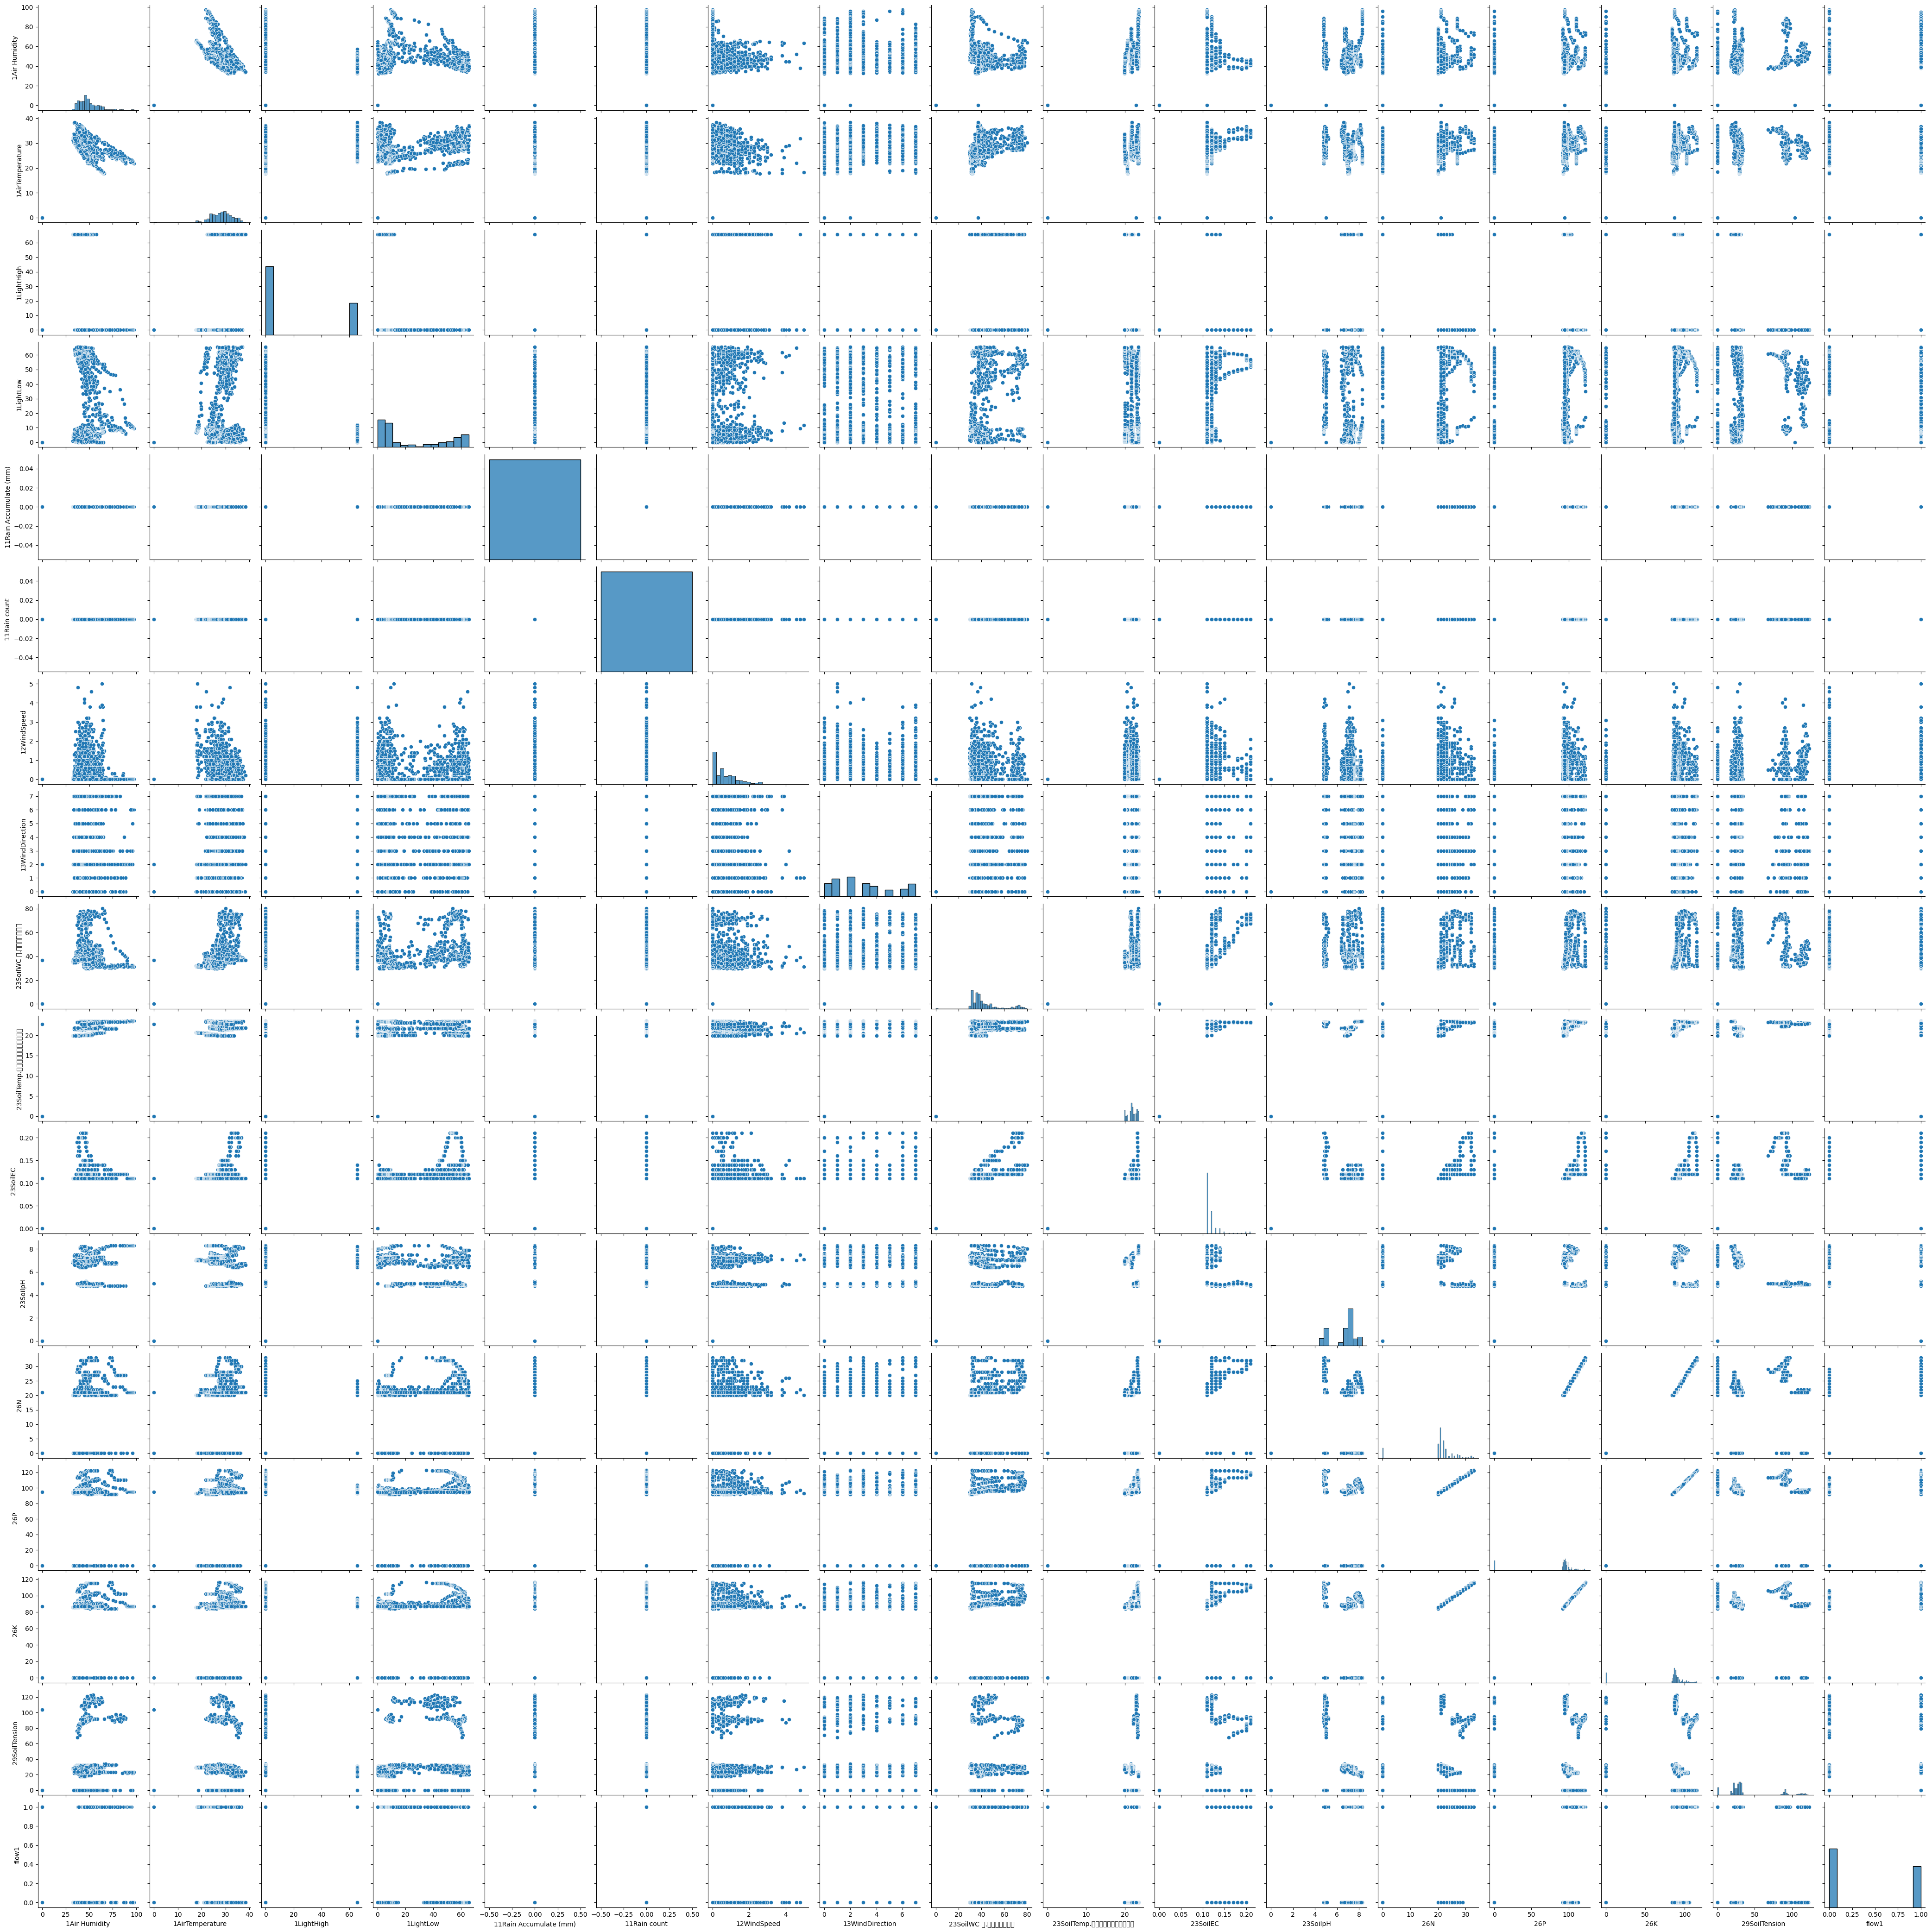

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot
sns.pairplot(df)
plt.show()

In [28]:
def remove_outliers(df):
    cleaned_data = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

In [29]:
# Remove outliers from the dataset
df = remove_outliers(df)

In [31]:
x_train = df[['1Air Humidity', '1AirTemperature', '1LightHigh',
                '1LightLow', '11Rain Accumulate (mm)', '11Rain count','12WindSpeed',
                '23SoilEC', '23SoilpH', '23SoilTemp.อุณหภูมิดิน',  '26N', '26P', '26K',
                '29SoilTension', 'flow1']]
y_train = df[['23SoilWC ค.ชื้นดิน']]

In [32]:
x_train.head()

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,23SoilEC,23SoilpH,23SoilTemp.อุณหภูมิดิน,26N,26P,26K,29SoilTension,flow1
21,75.1,28.1,0.0,46.37,0.0,0.0,0.0,0.12,8.3,23.5,23.0,101.0,94.0,23.0,1.0
49,48.0,32.3,0.0,62.16,0.0,0.0,0.0,0.12,7.8,23.4,25.0,104.0,97.0,22.0,0.0
50,45.7,33.0,0.0,61.97,0.0,0.0,0.0,0.12,7.8,23.3,25.0,103.0,96.0,21.0,0.0
51,44.8,34.4,0.0,62.74,0.0,0.0,0.0,0.12,7.8,23.4,25.0,103.0,96.0,21.0,0.0
52,45.5,34.4,0.0,63.44,0.0,0.0,0.0,0.12,7.8,23.4,24.0,103.0,96.0,21.0,0.0


<h1>X_test,Y_test</h1>

In [33]:
x_test = []
src2 = r'C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test'
for file in os.listdir(src2):
    print(os.path.join(src2,file))
    x_test.append(pd.read_csv(os.path.join(src2,file)))
x_test = pd.concat(x_test)
x_test = x_test.fillna(0)


C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test\set02.csv
C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test\set09.csv


In [34]:
x_test = x_test.drop(['index','time','13WindDirection'],axis=1)            # Drop column
x_test = x_test[x_train.columns]                                           # Reorder
x_test

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,23SoilEC,23SoilpH,23SoilTemp.อุณหภูมิดิน,26N,26P,26K,29SoilTension,flow1
0,46.2,30.7,65.53,8.79,0.0,0.0,1.3,0.11,7.9,22.4,21.0,95.0,88.0,26.0,0.0
1,46.0,31.4,65.53,8.26,0.0,0.0,0.0,0.11,7.9,22.4,21.0,95.0,88.0,26.0,0.0
2,44.4,32.2,65.53,8.66,0.0,0.0,1.0,0.11,7.9,22.3,21.0,95.0,88.0,0.0,0.0
3,43.0,33.0,65.53,8.68,0.0,0.0,0.0,0.11,7.9,22.4,21.0,95.0,88.0,26.0,0.0
4,42.4,32.9,65.53,8.86,0.0,0.0,0.0,0.11,7.9,22.4,21.0,95.0,88.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,36.2,35.9,0.00,53.35,0.0,0.0,0.0,0.12,4.9,23.7,27.0,110.0,103.0,48.0,0.0
112,39.8,35.9,0.00,54.13,0.0,0.0,1.9,0.12,4.9,23.7,27.0,110.0,103.0,0.0,0.0
113,38.4,35.8,0.00,54.11,0.0,0.0,0.0,0.12,4.9,23.7,27.0,110.0,103.0,48.0,0.0
114,38.2,35.6,0.00,54.26,0.0,0.0,0.0,0.12,4.9,23.7,27.0,110.0,103.0,45.0,0.0


<hr>
<hr>

<h2>03 Exploratory Data Analysis (EDA)</h2>

In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 21 to 116
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   1Air Humidity           568 non-null    float64
 1   1AirTemperature         568 non-null    float64
 2   1LightHigh              568 non-null    float64
 3   1LightLow               568 non-null    float64
 4   11Rain Accumulate (mm)  568 non-null    float64
 5   11Rain count            568 non-null    float64
 6   12WindSpeed             568 non-null    float64
 7   23SoilEC                568 non-null    float64
 8   23SoilpH                568 non-null    float64
 9   23SoilTemp.อุณหภูมิดิน  568 non-null    float64
 10  26N                     568 non-null    float64
 11  26P                     568 non-null    float64
 12  26K                     568 non-null    float64
 13  29SoilTension           568 non-null    float64
 14  flow1                   568 non-null    float6

In [36]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
1Air Humidity,568.0,47.864613,9.738520,32.30,39.30,46.700,54.6250,75.40
1AirTemperature,568.0,28.082394,4.691330,17.70,24.50,27.600,31.6000,38.40
1LightHigh,568.0,30.688345,32.727947,0.00,0.00,0.000,65.5300,65.53
1LightLow,568.0,15.892289,21.192172,0.00,2.93,6.655,12.8525,65.52
11Rain Accumulate (mm),568.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
11Rain count,568.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
12WindSpeed,568.0,0.671831,0.651831,0.00,0.00,0.600,1.1000,2.70
23SoilEC,568.0,0.111426,0.003550,0.11,0.11,0.110,0.1100,0.13
23SoilpH,568.0,7.175352,0.399415,6.40,6.90,7.100,7.4000,8.30
23SoilTemp.อุณหภูมิดิน,568.0,21.410211,1.015194,19.90,20.50,21.600,22.0000,23.50


In [37]:
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
1Air Humidity,229.0,43.634061,2.133149,36.20,42.40,43.90,45.10,49.90
1AirTemperature,229.0,32.561572,1.363692,30.20,31.40,32.50,33.40,36.40
1LightHigh,229.0,26.326463,32.196540,0.00,0.00,0.00,65.53,65.53
1LightLow,229.0,38.008341,26.244834,0.29,8.71,55.12,61.10,65.48
11Rain Accumulate (mm),229.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
11Rain count,229.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
12WindSpeed,229.0,0.831878,0.661197,0.00,0.40,0.70,1.10,3.40
23SoilEC,229.0,0.117074,0.008040,0.11,0.11,0.12,0.12,0.14
23SoilpH,229.0,6.161572,1.531542,4.40,4.70,4.90,7.70,7.90
23SoilTemp.อุณหภูมิดิน,229.0,22.921834,0.669940,22.10,22.30,23.50,23.60,23.70


<hr>

<h1>RandomForrest</h1>

In [9]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_hat = rf.predict(x_test)
y_hat

array([36.623, 36.698, 36.627, 37.08 , 37.113, 37.047, 36.827, 37.072,
       34.285, 34.491, 34.551, 34.494, 34.365, 34.266, 34.291, 35.738,
       37.321, 46.362, 48.317, 48.682, 49.642, 48.929, 49.859, 49.255,
       49.474, 50.329, 48.883, 49.688, 49.814, 44.336, 50.087, 43.582,
       69.748, 70.903, 70.   , 70.257, 70.013, 70.331, 69.938, 70.271,
       69.591, 69.242, 66.788, 69.174, 69.683, 68.038, 67.921, 69.516,
       68.417, 66.359, 67.444, 69.578, 68.125, 49.117, 51.574, 48.784,
       49.225, 49.429, 48.85 , 51.089, 44.34 , 48.859, 37.548, 39.811,
       39.787, 38.967, 39.688, 39.807, 39.603, 39.698, 39.869, 39.962,
       41.299, 41.529, 41.585, 41.444, 39.971, 38.023, 40.708, 40.278,
       39.678, 39.309, 39.412, 39.502, 39.507, 39.569, 38.999, 40.425,
       40.28 , 40.24 , 40.817, 40.328, 37.877, 40.503, 39.067, 38.877,
       39.007, 40.41 , 38.453, 39.89 , 38.839, 38.577, 38.471, 38.694,
       38.157, 38.046, 38.24 , 37.986, 38.101, 38.066, 37.98 , 37.913,
      

<h1>XGB</h1>

In [10]:
xb = xgb.XGBRegressor()
xb.fit(x_train, y_train)
y_hat = xb.predict(x_test)
y_hat

array([36.17722 , 35.352097, 35.18794 , 35.057014, 34.76025 , 34.802624,
       35.95767 , 35.3987  , 35.335   , 36.084312, 36.30521 , 35.748108,
       36.133545, 36.75612 , 35.51889 , 35.491543, 36.086433, 46.216103,
       50.618473, 49.63104 , 49.10952 , 48.953533, 50.461212, 48.57551 ,
       47.599075, 50.432785, 48.64828 , 50.012016, 50.21013 , 47.260406,
       51.184807, 47.487934, 74.47788 , 75.10791 , 74.227264, 72.53344 ,
       72.42512 , 73.192566, 73.10245 , 74.01222 , 72.78615 , 73.83416 ,
       72.64047 , 73.39079 , 73.76202 , 71.46801 , 71.66819 , 73.82916 ,
       71.449196, 70.48907 , 69.99119 , 72.57456 , 69.9048  , 48.482918,
       50.784348, 48.243828, 48.928043, 48.738495, 48.561687, 46.75708 ,
       43.032818, 46.748627, 37.27694 , 38.16132 , 38.48374 , 36.536892,
       37.91608 , 39.32624 , 39.189075, 39.05152 , 38.71509 , 38.956585,
       42.66302 , 43.110046, 42.83294 , 42.67854 , 39.01226 , 38.907894,
       40.590652, 41.09522 , 38.488308, 38.365738, 

<h1>Feature selection</h1>

In [25]:
xb = xgb.XGBRegressor()
reg_mod = RFECV(xb,
                cv=3,
                step=4
                )

In [26]:
_ = reg_mod.fit(x_train, y_train)

In [27]:
selected_columns = x_train.columns[reg_mod.support_]
print(reg_mod.support_)
print(selected_columns)

[False False False False False False False  True False False False False
 False False False]
Index(['23SoilEC'], dtype='object')


In [14]:
x_train.columns

Index(['1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow',
       '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '23SoilEC',
       '23SoilpH', '23SoilTemp.อุณหภูมิดิน', '26N', '26P', '26K',
       '29SoilTension', 'flow1'],
      dtype='object')

In [15]:
train_data_selected = x_train[selected_columns]
test_data_selected = x_test[selected_columns]

In [16]:
xb = xgb.XGBRegressor()
xb.fit(train_data_selected, y_train)
y_hat = xb.predict(test_data_selected)
y_hat

array([36.166336, 36.166336, 36.166336, 36.166336, 36.166336, 36.166336,
       36.166336, 36.166336, 36.166336, 36.166336, 36.166336, 36.166336,
       36.166336, 36.166336, 36.166336, 36.166336, 36.166336, 44.23318 ,
       44.23318 , 44.23318 , 44.23318 , 44.23318 , 44.23318 , 44.23318 ,
       44.23318 , 44.23318 , 44.23318 , 44.23318 , 44.23318 , 44.23318 ,
       44.23318 , 44.23318 , 62.1559  , 62.1559  , 62.1559  , 62.1559  ,
       62.1559  , 62.1559  , 62.1559  , 62.1559  , 62.1559  , 62.1559  ,
       62.1559  , 62.1559  , 62.1559  , 62.1559  , 62.1559  , 62.1559  ,
       62.1559  , 62.1559  , 62.1559  , 62.1559  , 62.1559  , 44.23318 ,
       44.23318 , 44.23318 , 44.23318 , 44.23318 , 44.23318 , 44.23318 ,
       44.23318 , 44.23318 , 36.166336, 36.166336, 36.166336, 36.166336,
       36.166336, 36.166336, 36.166336, 36.166336, 36.166336, 36.166336,
       36.166336, 36.166336, 36.166336, 36.166336, 36.166336, 36.166336,
       36.166336, 36.166336, 36.166336, 36.166336, 

<hr>

<h1>Model Selection</h1>

In [17]:
param_grid = {
        "colsample_bytree": [0.3, 0.4, 0.5],
        "gamma": [0],
        "learning_rate": [0.4, 0.5, 0.6],
        "max_depth": [1, 2, 3],
        "reg_lambda": [11, 12, 13],
        "scale_pos_weight": [0],
        "subsample": [0.4, 0.5, 0.6],
}

In [18]:
grid_cv = xgb.XGBRegressor()
grid_cv = GridSearchCV(
    grid_cv, 
    param_grid, 
    n_jobs=-1, 
    cv=3, 
    scoring='neg_mean_absolute_error'
)
_ = grid_cv.fit(train_data_selected, y_train)
grid_cv.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0,
 'learning_rate': 0.6,
 'max_depth': 1,
 'reg_lambda': 13,
 'scale_pos_weight': 0,
 'subsample': 0.4}

In [19]:
y_hat = grid_cv.predict(test_data_selected)
y_hat

array([35.946785, 35.946785, 35.946785, 35.946785, 35.946785, 35.946785,
       35.946785, 35.946785, 35.946785, 35.946785, 35.946785, 35.946785,
       35.946785, 35.946785, 35.946785, 35.946785, 35.946785, 44.718544,
       44.718544, 44.718544, 44.718544, 44.718544, 44.718544, 44.718544,
       44.718544, 44.718544, 44.718544, 44.718544, 44.718544, 44.718544,
       44.718544, 44.718544, 63.071476, 63.071476, 63.071476, 63.071476,
       63.071476, 63.071476, 63.071476, 63.071476, 63.071476, 63.071476,
       63.071476, 63.071476, 63.071476, 63.071476, 63.071476, 63.071476,
       63.071476, 63.071476, 63.071476, 63.071476, 63.071476, 44.718544,
       44.718544, 44.718544, 44.718544, 44.718544, 44.718544, 44.718544,
       44.718544, 44.718544, 35.946785, 35.946785, 35.946785, 35.946785,
       35.946785, 35.946785, 35.946785, 35.946785, 35.946785, 35.946785,
       35.946785, 35.946785, 35.946785, 35.946785, 35.946785, 35.946785,
       35.946785, 35.946785, 35.946785, 35.946785, 

<hr>

In [20]:
submission = pd.read_csv(r'C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\sample_submission.csv')

In [21]:
submission

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.1
1,02_2,NaN
2,02_3,NaN
3,02_4,NaN
4,02_5,NaN
...,...,...
224,09_112,NaN
225,09_113,NaN
226,09_114,NaN
227,09_115,NaN


In [22]:
submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y_hat[1:]

In [23]:
submission

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.100000
1,02_2,35.946785
2,02_3,35.946785
3,02_4,35.946785
4,02_5,35.946785
...,...,...
224,09_112,44.718544
225,09_113,44.718544
226,09_114,44.718544
227,09_115,44.718544


In [24]:
# submission.to_csv('v.0.0.2.csv',index=False)